Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [5]:
# Memuat dataset
data = pd.read_csv('/content/heart.csv')
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Preprosesing Data

In [6]:
# Memeriksa nilai yang hilang
print(data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [7]:
# Melihat informasi dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [8]:
# Menghapus baris dengan nilai missing
data = data.dropna()


In [9]:
# Pemetaan untuk kolom Sex
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1})

# Pemetaan untuk kolom ChestPainType
data['ChestPainType'] = data['ChestPainType'].map({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3})

# Pemetaan untuk kolom ExerciseAngina
data['ExerciseAngina'] = data['ExerciseAngina'].map({'N': 0, 'Y': 1})

# Pemetaan untuk kolom ST_Slope
data['ST_Slope'] = data['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

# Mengubah tipe data kolom RestingBP menjadi integer
data['RestingECG'] = data['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})


# Mengubah tipe data kolom yang sudah dipetakan menjadi integer
data['Sex'] = data['Sex'].astype(int)
data['ChestPainType'] = data['ChestPainType'].astype(int)
data['ExerciseAngina'] = data['ExerciseAngina'].astype(int)
data['ST_Slope'] = data['ST_Slope'].astype(int)
data['RestingECG'] = data['RestingECG'].astype(int)


In [10]:
# Menampilkan hasil akhir
print("\nData after cleaning and mapping:")
print(data)

# Menampilkan tipe data kolom
print("\nData types after conversion:")
print(data.dtypes)


Data after cleaning and mapping:
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              1        140          289          0           0   
1     49    1              2        160          180          0           0   
2     37    0              1        130          283          0           1   
3     48    1              3        138          214          0           0   
4     54    0              2        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              0        110          264          0           0   
914   68    0              3        144          193          1           0   
915   57    0              3        130          131          0           0   
916   57    1              1        130          236          0           2   
917   38    0              2        138          175          0           0   

     MaxHR  Exerc

Normalisasi Data

In [11]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Normalisasi Data
scaler = MinMaxScaler(feature_range=(1, 2))  # Inisialisasi MinMaxScaler dengan rentang [1, 2]

# Memilih kolom yang ingin dinormalisasi
columns_to_normalize = ['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']  # Ganti dengan nama kolom yang sesuai

# Menangani nilai NaN jika ada
# Check if the DataFrame is empty before filling NaN values
if not data.empty:
    data[columns_to_normalize] = data[columns_to_normalize].fillna(data[columns_to_normalize].mean())

# Melakukan normalisasi
# Check if the DataFrame is empty before normalization
if not data.empty:
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
else:
    print("DataFrame is empty. Normalization cannot be performed.")

In [13]:
# Menampilkan hasil akhir
print("\nData after normalization:")
print(data[columns_to_normalize])


Data after normalization:
     RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak
0         1.70     1.479270        1.0  1.788732  1.295455
1         1.80     1.298507        1.0  1.676056  1.409091
2         1.65     1.469320        1.0  1.267606  1.295455
3         1.69     1.354892        1.0  1.338028  1.465909
4         1.75     1.323383        1.0  1.436620  1.295455
..         ...          ...        ...       ...       ...
913       1.55     1.437811        1.0  1.507042  1.431818
914       1.72     1.320066        2.0  1.570423  1.681818
915       1.65     1.217247        1.0  1.387324  1.431818
916       1.65     1.391376        1.0  1.802817  1.295455
917       1.69     1.290216        1.0  1.795775  1.295455

[918 rows x 5 columns]


In [14]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,1.70,1.479270,1.0,0,1.788732,0,1.295455,0,0
1,49,1,2,1.80,1.298507,1.0,0,1.676056,0,1.409091,1,1
2,37,0,1,1.65,1.469320,1.0,1,1.267606,0,1.295455,0,0
3,48,1,3,1.69,1.354892,1.0,0,1.338028,1,1.465909,1,1
4,54,0,2,1.75,1.323383,1.0,0,1.436620,0,1.295455,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,1.55,1.437811,1.0,0,1.507042,0,1.431818,1,1
914,68,0,3,1.72,1.320066,2.0,0,1.570423,0,1.681818,1,1
915,57,0,3,1.65,1.217247,1.0,0,1.387324,1,1.431818,1,1
916,57,1,1,1.65,1.391376,1.0,2,1.802817,0,1.295455,1,1


Visualisasi Data

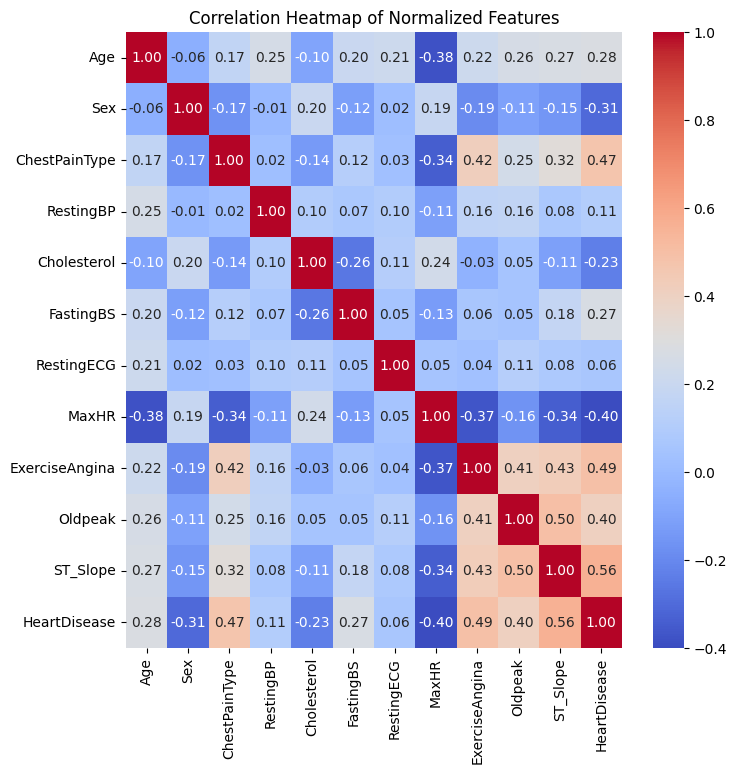

In [15]:
# Create a correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Normalized Features")
plt.show()

Heatmap menunjukkan korelasi antara fitur-fitur yang dinormalisasi. Setiap kotak mewakili korelasi antara dua fitur. Korelasi positif diwakili dengan warna merah, sedangkan korelasi negatif diwakili dengan warna biru. Intensitas warna menunjukkan kekuatan korelasi.

Dari heatmap, kita dapat melihat bahwa:

- Fitur 'ExerciseAngina' memiliki korelasi positif kuat dengan 'HeartDisease'. Ini berarti bahwa orang yang mengalami nyeri dada selama olahraga lebih cenderung memiliki penyakit jantung.
- Fitur 'Oldpeak' memiliki korelasi positif yang cukup kuat dengan 'HeartDisease'. Ini menunjukkan bahwa orang yang memiliki penurunan ST yang signifikan setelah olahraga lebih cenderung memiliki penyakit jantung.
- Fitur 'ST_Slope' memiliki korelasi positif kuat dengan 'HeartDisease'. Ini menunjukkan bahwa orang yang memiliki kemiringan ST yang lebih tinggi setelah olahraga lebih cenderung memiliki penyakit jantung.
- Fitur 'MaxHR' memiliki korelasi negatif yang moderat dengan 'HeartDisease'. Ini berarti bahwa orang yang memiliki detak jantung maksimum yang lebih tinggi selama olahraga cenderung kurang memiliki penyakit jantung.

Secara keseluruhan, heatmap menunjukkan bahwa beberapa fitur dalam dataset memiliki korelasi yang signifikan dengan 'HeartDisease'. Ini menunjukkan bahwa fitur-fitur ini dapat menjadi prediktor yang baik untuk penyakit jantung.

Modeling Decision Tree

In [18]:
# Import the necessary library and function
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = data.drop('HeartDisease', axis=1)  # Menghapus kolom target dari fitur
y = data['HeartDisease']  # Kolom target

# Membagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Import the necessary library and function
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

# Inisialisasi model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Parameter grid untuk pencarian
param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Melatih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best cross-validation accuracy:", grid_search.best_score_)

Best max_depth: 4
Best cross-validation accuracy: 0.826949958065418


Tree Tanpa Scaling

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree = DecisionTreeClassifier(
    max_depth = 4,
    criterion = 'entropy'
)

In [24]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [25]:
y_pred_class = tree.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score # Import the accuracy_score function

print('akurasi adalah ' ,accuracy_score(y_test, y_pred_class)*100, '%')

akurasi adalah  86.95652173913044 %


In [27]:
from sklearn.tree import plot_tree

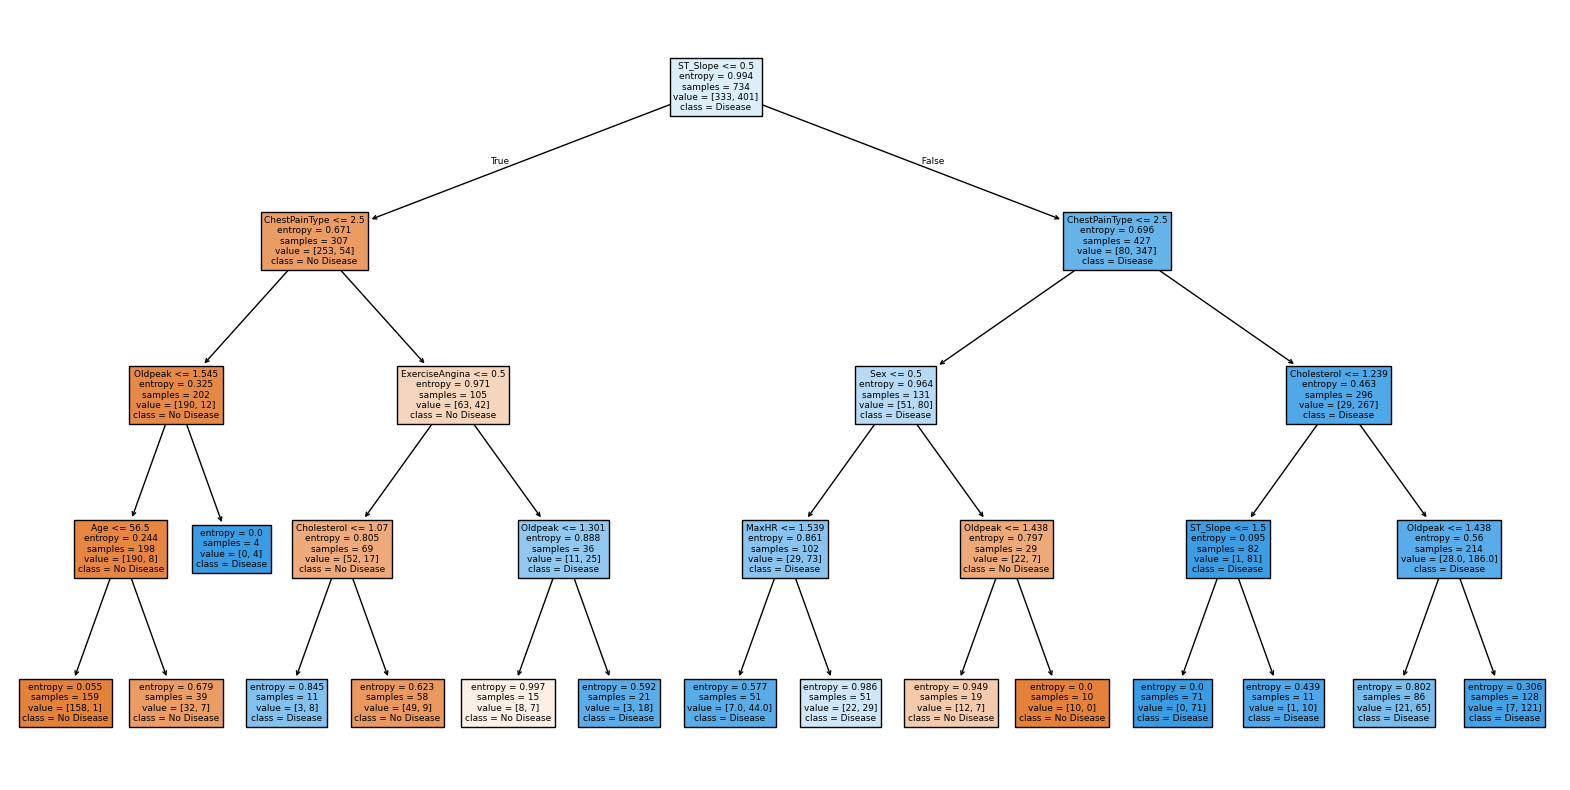

In [28]:
plt.figure(figsize = (20,10))
plot_tree(tree, feature_names = list(X), class_names = ['No Disease', 'Disease'], filled = True)
plt.show()

Plot pohon keputusan tersebut adalah representasi visual dari algoritma pohon keputusan yang digunakan untuk memprediksi apakah seseorang menderita penyakit jantung atau tidak. Pohon tersebut dibangun dengan menggunakan dataset yang berisi informasi tentang pasien, seperti usia, jenis kelamin, kolesterol, dll. Setiap node pada pohon mewakili atribut tertentu, dan setiap cabang mewakili nilai yang mungkin untuk atribut tersebut. Pohon tersebut dibangun dengan tujuan untuk meminimalkan ketidakpastian dalam memprediksi kelas (penyakit jantung atau tidak) untuk setiap pasien baru.

Berikut adalah penjabaran plot pohon tersebut:

- Root Node: Node teratas pada pohon, yang mewakili atribut ST_Slope (kemiringan segmen ST) dan nilai <=0.5. Berdasarkan atribut ini, data dipisahkan menjadi dua cabang: cabang True (ST_Slope <=0.5) dan cabang False (ST_Slope >0.5).

- Cabang True (ST_Slope <=0.5): Cabang ini mewakili pasien dengan kemiringan segmen ST <=0.5. Node selanjutnya pada cabang ini adalah ChestPainType (jenis nyeri dada). Jika jenis nyeri dada <=2.5, maka pasien diprediksi tidak menderita penyakit jantung (No Disease). Jika jenis nyeri dada >2.5, maka pasien diprediksi menderita penyakit jantung (Disease).

- Cabang False (ST_Slope >0.5): Cabang ini mewakili pasien dengan kemiringan segmen ST >0.5. Node selanjutnya pada cabang ini adalah Sex (jenis kelamin). Jika jenis kelamin adalah perempuan (Sex <=0.5), maka pasien diprediksi menderita penyakit jantung (Disease). Jika jenis kelamin adalah laki-laki (Sex >0.5), maka data dipisahkan lagi berdasarkan atribut Cholesterol (kolesterol).

- Cholesterol (kolesterol): Pada cabang ini, data dipisahkan lagi berdasarkan kolesterol. Jika kolesterol <=1.239, maka pasien diprediksi menderita penyakit jantung (Disease). Jika kolesterol >1.239, maka data dipisahkan lagi berdasarkan atribut Oldpeak (perbedaan nilai ST).

- Oldpeak (perbedaan nilai ST): Pada cabang ini, data dipisahkan lagi berdasarkan perbedaan nilai ST. Jika Oldpeak <=1.438, maka pasien diprediksi menderita penyakit jantung (Disease). Jika Oldpeak >1.438, maka pasien

Tree dengan scalling

In [31]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train_scale = scaler.fit_transform(X_train)

# Now you can use X_train_scale
X_train_scale

array([[-1.24506731, -0.54060477, -0.29479827, ..., -0.83846064,
        -0.09706109,  2.25746543],
       [-1.8862362 , -0.54060477, -0.29479827, ..., -0.83846064,
        -0.83628643, -1.07985506],
       [ 0.25099346, -0.54060477,  0.79803975, ...,  1.19266183,
         0.08774524,  0.58880518],
       ...,
       [ 0.67843939, -0.54060477,  0.79803975, ...,  1.19266183,
         0.45735791, -1.07985506],
       [ 0.67843939, -0.54060477,  0.79803975, ...,  1.19266183,
        -0.83628643, -1.07985506],
       [-1.45879027,  1.84978019,  0.79803975, ..., -0.83846064,
         1.01177691,  0.58880518]])

In [32]:
tree_scaled = DecisionTreeClassifier(
    max_depth = 4,
    criterion = 'entropy'
)

In [34]:
tree_scaled.fit(X_train_scale, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [36]:
# Transform the test data using the same scaler used for training data
X_test_scaled = scaler.transform(X_test)

# Now you can use X_test_scaled for prediction
y_pred_test_scaled = tree_scaled.predict(X_test_scaled)

In [38]:
print('akurasi adalah ' ,accuracy_score(y_test, y_pred_test_scaled)*100, '%')

akurasi adalah  86.95652173913044 %


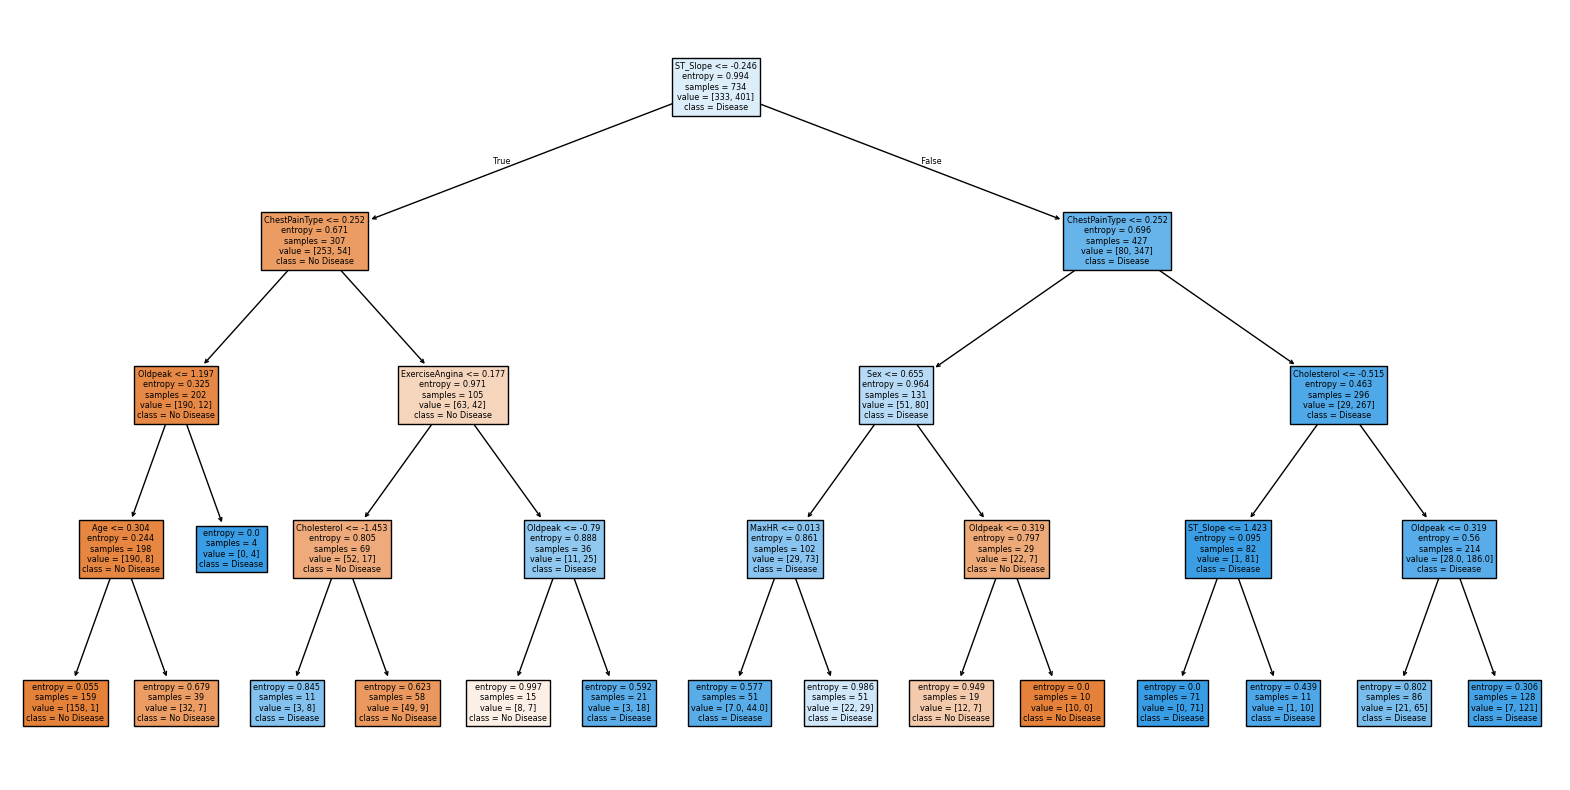

In [39]:
plt.figure(figsize = (20,10))
plot_tree(tree_scaled, feature_names = list(X), class_names = ['No Disease', 'Disease'], filled = True)
plt.show()

Tree scalling tidak di perlukan karena akurasinya?performa sama dan akan lebih mempersulit kita dalam mengintreprestasikan hasilnya

Evaluasi Model Tanpa Scaling:
Evaluasi Model: Decision Tree Tanpa Scaling
Akurasi: 0.8695652173913043
Precision: 0.8952380952380953
Recall: 0.8785046728971962

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



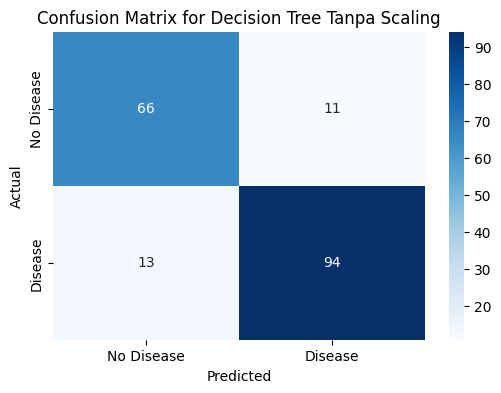

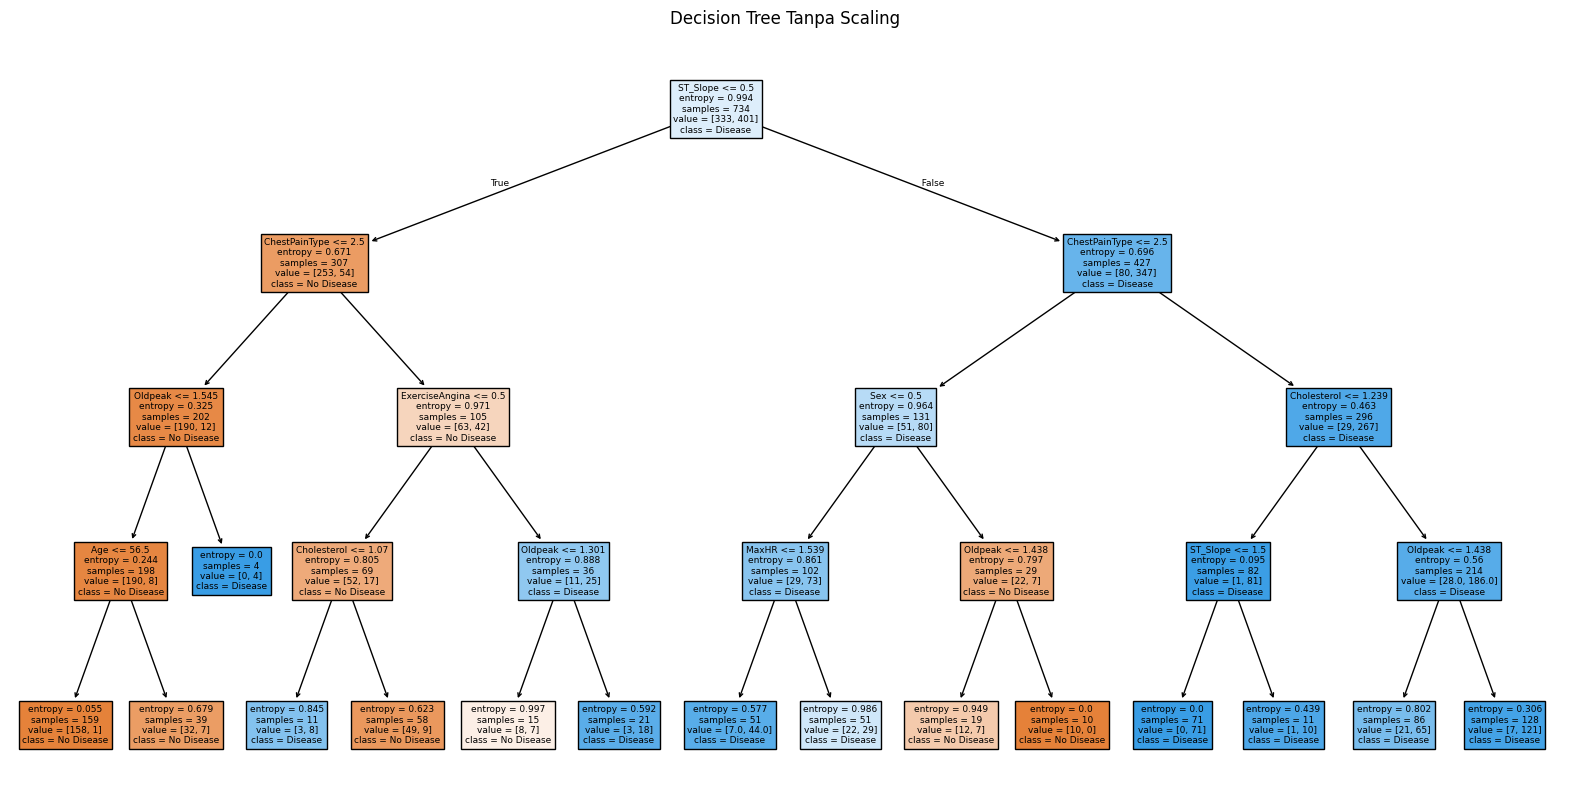

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk mengevaluasi model
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluasi Model: {model_name}")
    print("Akurasi:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Evaluasi model tanpa scaling
print("Evaluasi Model Tanpa Scaling:")
evaluate_model(y_test, y_pred_class, "Decision Tree Tanpa Scaling")

# Visualisasi Decision Tree Tanpa Scaling
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=list(X.columns), class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Tanpa Scaling")
plt.show()

**Hasil Analisis**

Model Decision Tree tanpa scaling memiliki performa yang cukup baik dengan akurasi 86,96%, presisi 89,52%, dan recall 87,85%.

Dari diagram confusion matrix terlihat bahwa model lebih baik dalam memprediksi kelas "Disease" dibandingkan kelas "No Disease". Hal ini ditunjukkan oleh nilai recall yang lebih tinggi pada kelas "Disease". Namun, nilai recall pada kelas "No Disease" juga cukup baik (86%), sehingga model dapat dikatakan seimbang dalam memprediksi kedua kelas. Secara keseluruhan, model Decision Tree tanpa scaling dapat dikatakan memiliki performa yang cukup baik.